In [1]:
!pip install pymysql

In [39]:
import pymysql
from getpass import getpass
from IPython.display import display, Image
import warnings
warnings.filterwarnings("ignore")

In [40]:
db_name = 'ValorRecruit'
db_host = '127.0.0.1'
db_usernm = 'root'

In [41]:
def sql_connection():
    try:
        connection = pymysql.connect(host = db_host,
                                    port = int(3306),
                                    user = db_usernm,
                                    password = getpass('password'),
                                    db = db_name)
        if connection:
            print("Database connected successfully")
            return connection
        else:
            print("Not connected")
    except Exception as e: 
        print(e)

In [42]:
conn = sql_connection()
conn

password········
Database connected successfully


In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Agents That Haven't Appeared in Top Rankings**

In [44]:
agent_top = """SELECT AgentName
FROM Agents
WHERE AgentName NOT IN (SELECT DISTINCT AgentName FROM TopAgents);
"""

In [45]:
df1 = pd.read_sql_query(agent_top, conn)
df1

,AgentName
0,Raze


**Players with Above-Average ACS (Average Combat Score):**

In [46]:
acs_and_player = """SELECT PlayerID, ACS
FROM Player
INNER JOIN InGameStatistics ON Player.IGRank = InGameStatistics.IGRank
WHERE ACS > (SELECT AVG(ACS) FROM InGameStatistics);"""

In [47]:
df2 = pd.read_sql_query(acs_and_player,conn)
df2

,PlayerID,ACS
0,13-2304969,55.63
1,78-6510937,94.45
2,20-2848667,99.72
3,12-8631410,88.44
4,15-9609982,51.51
5,78-9972847,62.92
6,46-5170285,74.42
7,78-9235369,56.48
8,92-5568716,68.00
9,30-8902576,88.15


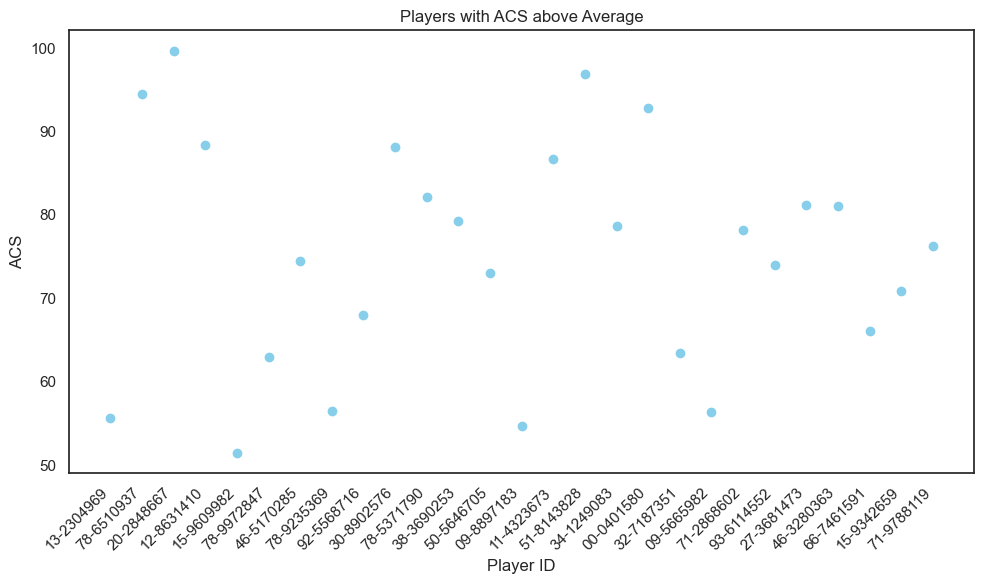

Analysis: The graph shows that the avarage acs is above 50, and there are 27 players who rank above average, the graph showcases each player's ACS


In [48]:
# Plot the data using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df2['PlayerID'], df2['ACS'], color='skyblue', marker='o')
plt.title('Players with ACS above Average')
plt.xlabel('Player ID')
plt.ylabel('ACS')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Show the plot
plt.show()

print("Analysis: The graph shows that the avarage acs is above 50, and there are 27 players who rank above average, the graph showcases each player's ACS")

**Average headshot percentage for each weapon**

In [49]:
head_weapon="""SELECT TopWeapons.Weapon, AVG(InGameStatistics.HeadshotPer) AS AvgHeadshotPer
FROM TopWeapons
JOIN Player ON TopWeapons.PlayerID = Player.PlayerID
JOIN InGameStatistics ON Player.IGRank = InGameStatistics.IGRank
GROUP BY Weapon
ORDER BY AvgHeadshotPer DESC;
"""

In [50]:
df3 = pd.read_sql_query(head_weapon,conn)
df3

,Weapon,AvgHeadshotPer
0,Frenzy,90.360001
1,Ares,63.263636
2,Classic,62.575000
3,Bulldog,57.593333
4,Marshal,55.775999
5,Phantom,51.086841
6,Ghost,46.589375
7,Stinger,43.795333
8,Operator,42.634000
9,Vandal,41.823333


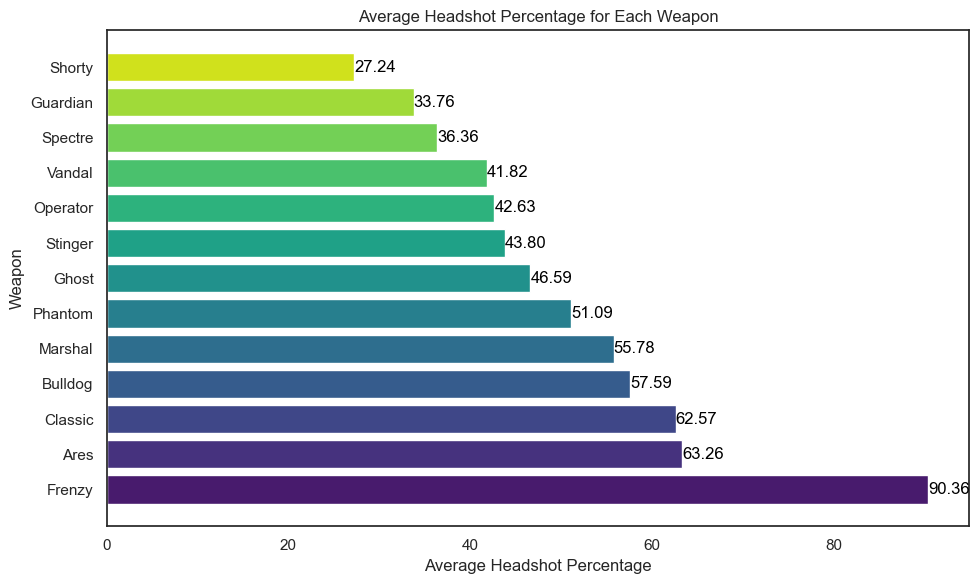

In [51]:
sns.set(style="white")
plt.figure(figsize=(10, 6))
bars = plt.barh(df3['Weapon'], df3['AvgHeadshotPer'], color=sns.color_palette('viridis', n_colors=len(df3)))

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', ha='left', va='center', color='black')

plt.title('Average Headshot Percentage for Each Weapon')
plt.xlabel('Average Headshot Percentage')
plt.ylabel('Weapon')
plt.tight_layout()
plt.show()

**Observations:**
It is observed that the most headshots have been made using the Frenzy, Average being 90.36%, The graph helps the player to pick the weapons that are most effective. 

**The most popular map among players with the highest leaderboard ranks**

In [52]:
map_lead = """SELECT MapName, COUNT(*) AS NumPlayers
FROM TopMaps
JOIN Player ON TopMaps.PlayerID = Player.PlayerID
JOIN LeaderboardStatistics ON Player.LBRank = LeaderboardStatistics.LBRank
WHERE LeaderboardStatistics.LBRank >= 10
GROUP BY MapName
ORDER BY NumPlayers DESC
"""

In [53]:
df4 = pd.read_sql_query(map_lead,conn)
df4

,MapName,NumPlayers
0,Haven,26
1,Pearl,21
2,Breeze,21
3,Bind,17
4,Pool,17
5,Fracture,14
6,Icebox,13
7,Lotus,11


In [54]:
import plotly.express as px
fig = px.pie(df4, names='MapName', values='NumPlayers', title='Distribution of Players on Top Maps (Leaderboard Rank >= 10)',
             labels={'NumPlayers': 'Number of Players'})
fig.show()

**Observation:** 
    The chart represents the top-player's map of choice! We can say that players have a high rate of success in the Fracture map from the above chart. 

**Most common weapon and agent among players with the highest in-game ranks:**

In [36]:
w_and_a = """SELECT Weapon, AgentName, COUNT(*) AS NumPlayers
FROM TopWeapons
JOIN TopAgents ON TopWeapons.PlayerID = TopAgents.PlayerID
JOIN InGameStatistics ON TopAgents.PlayerID = InGameStatistics.IGRank
WHERE InGameStatistics.IGRank <= 10
GROUP BY Weapon, AgentName
ORDER BY NumPlayers DESC
LIMIT 5
"""

In [37]:
df5 = pd.read_sql_query(w_and_a,conn)
df5

,Weapon,AgentName,NumPlayers
0,Phantom,Omen,6
1,Ghost,Omen,6
2,Phantom,Cypher,4
3,Bulldog,Jett,4
4,Stinger,Omen,4


In [38]:
fig = px.bar(df5, x='Weapon', y='NumPlayers', color='AgentName',
             title='Top 5 Weapon and Agent Combinations (Number of Players)',
             labels={'NumPlayers': 'Number of Players'},
             color_discrete_sequence=px.colors.qualitative.Set1)

fig.update_layout(xaxis_title='Weapon', yaxis_title='Number of Players')
fig.show()

**Observations:**
Preference for Phantom and Omen: The Phantom rifle and Omen agent seem to be consistently popular among high-ranking players. This could be due to the versatility of the Phantom and the strategic utility of Omen in high-level gameplay.

Variety in Combinations: While Phantom and Omen dominate, there is still a variety of weapon and agent combinations among top-ranking players. This suggests that players at the highest ranks may have diverse playstyles and strategies.

Role Diversity: The choice of agents such as Cypher and Jett indicates a consideration of specific roles within the team, with Cypher being known for surveillance and Jett for agility.

Weapon Diversity: Players at the highest ranks seem to favor a mix of rifles (Phantom, Bulldog) and SMGs (Stinger), adapting their weapon choices to different in-game situations.